<h1>Pie Chart</h1>

Index(['Unnamed: 0', 'author_average_rating', 'author_gender', 'author_genres',
       'author_id', 'author_name', 'author_rating_count',
       'author_review_count', 'birthplace', 'book_average_rating', 'book_id',
       'book_title', 'genre_2', 'num_ratings', 'num_reviews', 'pages',
       'publish_date'],
      dtype='object')

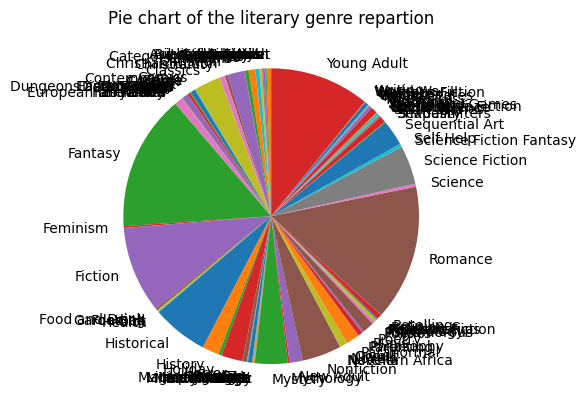

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 
DataFrame = pd.read_csv("../new_data/CleanedAuthors.csv")

DFGrouped = DataFrame.groupby(by="genre_1").count()
display(DFGrouped.columns)

plt.pie(DFGrouped["book_id"], labels=DFGrouped.index.values, startangle=90)
plt.title("Pie chart of the literary genre repartion")
plt.show()

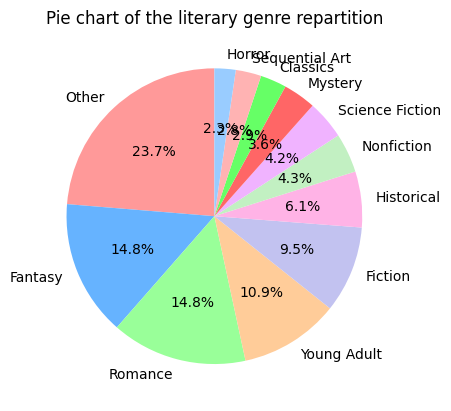

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
DataFrame = pd.read_csv("../new_data/CleanedAuthors.csv")

# Custom color palette for the pie chart
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#c2c2f0', '#ffb3e6', '#c2f0c2', '#f0b3ff', '#ff6666', '#66ff66', '#ffb3b3', '#99ccff']

# Group by genre and count occurrences
DFGrouped = DataFrame.groupby(by="genre_1").count()

# Calculate percentage of each genre
total = DFGrouped["book_id"].sum()
DFGrouped["percentage"] = (DFGrouped["book_id"] / total) * 100

# Separate the genres with more than 2% and group others
threshold = 2
above_threshold = DFGrouped[DFGrouped["percentage"] > threshold]
below_threshold = DFGrouped[DFGrouped["percentage"] <= threshold]

# Add the 'Other' category for genres below the threshold
other = pd.DataFrame(data={"book_id": [below_threshold["book_id"].sum()],
                           "percentage": [below_threshold["percentage"].sum()]},
                     index=["Other"])

# Combine the above threshold and "Other" data
DFGroupedFinal = pd.concat([above_threshold, other])

# Sort the genres by percentage
DFGroupedFinal = DFGroupedFinal.sort_values(by="percentage", ascending=False)

# Prepare the pie chart and show it
plt.pie(DFGroupedFinal["book_id"], labels=DFGroupedFinal.index.values, startangle=90, autopct='%1.1f%%',  colors=colors)
plt.title("Pie chart of the literary genre repartition")
plt.show()
